# **AlexNet Implementing**

The AlexNet proposed by Alex Krizhevsky in his work has eight layers including five convolutional layers followed by three fully connected layers. Some of the convolutional layers of the model are followed by max-pooling layers. As an activation function, the ReLU function is used by the network which shows improved performance over sigmoid and tanh functions.


This is the architecture of AlexNet

<img src="https://analyticsindiamag.com/wp-content/uploads/2020/06/Architecture.png" >

The network consists of a kernel or filters with size 11 x 11, 5 x 5, 3 x 3, 3 x 3 and 3 x 3 for its five convolutional layers respectively. The rest of the parameters of the network can be tuned depending on the training performances.

[Paper by Alex](https://papers.nips.cc/paper/4824-imagenet-classification-with-deep-convolutional-neural-networks.pdf)

[CIFAR10 Dataset](https://www.cs.toronto.edu/~kriz/cifar.html)

In [62]:
#import libraries 
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization


**First Convulation Apply**
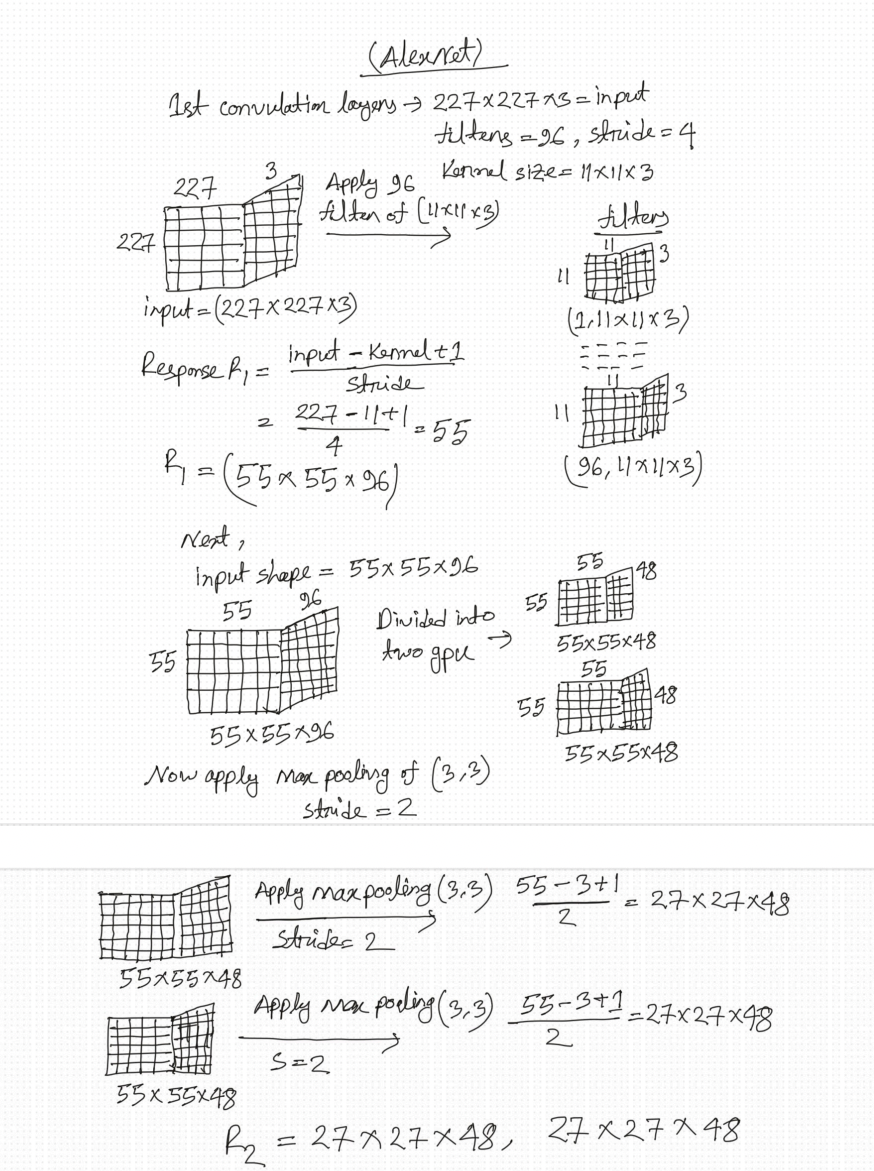


[Calculation of the Shape](https://github.com/Shakib-IO/CSE465/blob/main/AlexNet.pdf)

In [91]:
#This is basic implementation of Alexnet
#Now build the AlexNet
np.random.seed(1000)
#Initialize
AlexNet = Sequential()

#1st convulation where input_shape is (227 x 227 x 3), No. of filters = 96, Kernel_size = (11 x 11 x 3), Stride = 4, where shape(Width x Height x Channel)
AlexNet.add(Conv2D(input_shape=(227,227,3), filters=96, kernel_size=(11,11), strides=(4,4), padding='valid')) #Get Response R1 = (55 x 55 x 96)
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
#Maxpooling = (3,3) with Stride = (2,2)
AlexNet.add(MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='valid')) #Get respone R2 = (27 x 27 x 96)


#2nd convulation where input_shape is (27 x 27 x 96), No. of filters = 256, Kernel_size = (5 x 5 x 96), Stride = 1, Padding = 1 where shape_define= (Width x Height x Channel)
AlexNet.add(Conv2D(input_shape=(27,27,96), filters=256, kernel_size=(5,5), strides=(1,1), padding='same')) #Get Response R3 = (27 x 27 x 256)
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
#Maxpooling = (3,3) with Stride = (2,2)
AlexNet.add(MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='valid')) #Get Response R4 = (13 x 13 x 256)


#3rd convulation where input_shape is (13 x 13 x 256), No. of filters = 384, Kernel_size = (3 x 3 x 256), Stride = 1, Padding = 1 where shape_define= (Width x Height x Channel)
AlexNet.add(Conv2D(input_shape=(13,13,256), filters=384, kernel_size=(3,3), strides=(1,1), padding='same')) #Get Response R5 = (13 x 13 x 384)
AlexNet.add(BatchNormalization())
#AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))


#4th convulation where input_shape is (13 x 13 x 384), No. of filters = 384, Kernel_size = (3 x 3 x 384), Stride = 1, Padding = 1 where shape_define= (Width x Height x Channel)
AlexNet.add(Conv2D(input_shape=(13,13,384), filters=384, kernel_size=(3,3), strides=(1,1), padding='same')) #Get Response R6 = (13 x 13 x 384)
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))


#5th convulation where input_shape is (13 x 13 x 384), No. of filters = 256, Kernel_size = (3 x 3 x 384), Stride = 1, Padding = 1 where shape_define= (Width x Height x Channel)
AlexNet.add(Conv2D(input_shape=(13,13,384), filters=256, kernel_size=(3,3), strides=(1,1), padding='same')) #Get Response R7 = (13 x 13 x 256)
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
#Maxpooling = (3,3) with Stride = (2,2)
AlexNet.add(MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='valid')) #Get Response R8 = (6 x 6 x 256)


#Now Apply Fully Connected(FC) layer
#First flatten the shpae
AlexNet.add(Flatten())

# 1st Fully Connected Layer
AlexNet.add(Dense(4096, input_shape=(6,6,3,)))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
# Add Dropout to prevent overfitting
AlexNet.add(Dropout(0.4))

#2nd Fully Connected Layer
AlexNet.add(Dense(4096))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
#Add Dropout
AlexNet.add(Dropout(0.4))

#3rd Fully Connected Layer
AlexNet.add(Dense(1000))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
#Add Dropout
AlexNet.add(Dropout(0.4))

#Output Layer
AlexNet.add(Dense(10))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('softmax'))

#Model Summary
AlexNet.summary()



Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_69 (Conv2D)           (None, 55, 55, 96)        34944     
_________________________________________________________________
batch_normalization_106 (Bat (None, 55, 55, 96)        384       
_________________________________________________________________
activation_108 (Activation)  (None, 55, 55, 96)        0         
_________________________________________________________________
max_pooling2d_43 (MaxPooling (None, 27, 27, 96)        0         
_________________________________________________________________
conv2d_70 (Conv2D)           (None, 27, 27, 256)       614656    
_________________________________________________________________
batch_normalization_107 (Bat (None, 27, 27, 256)       1024      
_________________________________________________________________
activation_109 (Activation)  (None, 27, 27, 256)     

In [92]:
#The CIFAR10 dataset image size is (32,32,3) So for this input_shape = (32 x 32 x 3)
# Initialize the model.
model = Sequential()
          
# 1st Convolutional Layer
model.add(Conv2D(filters = 96, input_shape = (32,32,3), kernel_size = (11,11), strides = (4,4), padding = 'valid'))
model.add(Activation('relu'))
# Batch Normalisation before passing it to the next layer
model.add(BatchNormalization())
# Pooling Layer
model.add(MaxPooling2D(pool_size = (3,3), strides = (2,2), padding = 'valid'))

# 2nd Convolutional Layer
model.add(Conv2D(filters = 256, kernel_size = (5,5), strides = (1,1), padding = 'same'))
model.add(Activation('relu'))
# Batch Normalisation
model.add(BatchNormalization())
# Pooling Layer
model.add(MaxPooling2D(pool_size = (3,3), strides = (2,2), padding = 'same'))

# 3rd Convolutional Layer
model.add(Conv2D(filters = 384, kernel_size = (3,3), strides = (1,1), padding = 'same'))
model.add(Activation('relu'))
# Batch Normalisation
model.add(BatchNormalization())
# Dropout
model.add(Dropout(0.5))

# 4th Convolutional Layer
model.add(Conv2D(filters = 384, kernel_size = (3,3), strides = (1,1), padding = 'same'))
model.add(Activation('relu'))
# Batch Normalisation
model.add(BatchNormalization())
# Dropout
model.add(Dropout(0.5))

# 5th Convolutional Layer
model.add(Conv2D(filters = 256, kernel_size = (3,3), strides = (1,1), padding = 'same'))
model.add(Activation('relu'))
# Batch Normalisation
model.add(BatchNormalization())
# Pooling Layer
model.add(MaxPooling2D(pool_size = (3,3), strides = (2,2), padding = 'same'))
# Dropout
model.add(Dropout(0.5))

# Passing it to a dense layer
model.add(Flatten())

# 1st Dense Layer
model.add(Dense(4096, input_shape = (32*32*3,)))
model.add(Activation('relu'))
# Add Dropout to prevent overfitting
model.add(Dropout(0.25))
# Batch Normalisation
model.add(BatchNormalization())

# 2nd Dense Layer
model.add(Dense(4096))
model.add(Activation('relu'))
# Add Dropout
model.add(Dropout(0.5))
# Batch Normalisation
model.add(BatchNormalization())

# 3rd Dense Layer
model.add(Dense(1000))
model.add(Activation('relu'))
# Add Dropout
model.add(Dropout(0.5))
# Batch Normalisation
model.add(BatchNormalization())

# Output Layer
model.add(Dense(10))
model.add(Activation('softmax'))

# Get the model summary.
model.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_74 (Conv2D)           (None, 6, 6, 96)          34944     
_________________________________________________________________
activation_117 (Activation)  (None, 6, 6, 96)          0         
_________________________________________________________________
batch_normalization_115 (Bat (None, 6, 6, 96)          384       
_________________________________________________________________
max_pooling2d_46 (MaxPooling (None, 2, 2, 96)          0         
_________________________________________________________________
conv2d_75 (Conv2D)           (None, 2, 2, 256)         614656    
_________________________________________________________________
activation_118 (Activation)  (None, 2, 2, 256)         0         
_________________________________________________________________
batch_normalization_116 (Bat (None, 2, 2, 256)       

[Network Summary](https://learnopencv.com/number-of-parameters-and-tensor-sizes-in-convolutional-neural-network/)

[Code implementation](https://github.com/amir-saniyan/AlexNet/blob/master/alexnet.py)

In [94]:
#Now lets compile the model
#AlexNet.compile(optimizer='adam', loss= keras.losses.categorical_crossentropy,metrics=['accuracy'])

model.compile(optimizer='adam', loss= keras.losses.categorical_crossentropy,metrics=['accuracy'])

**Let's implement the dataset**

we will check its performance in classification. For the same, we will use the CIFAR10 dataset that is a popular benchmark in image classification. The CIFAR-10 dataset is a publically available image data set provided by the Canadian Institute for Advanced Research (CIFAR). It consists of 60000 32×32 colour images in 10 classes, with 6000 images per class. The 10 different classes represent airplanes, cars, birds, cats, deer, dogs, frogs, horses, ships, and trucks. There are 50000 training images and 10000 test images in this dataset.

[CIFAR10 Dataset](https://www.cs.toronto.edu/~kriz/cifar.html)

Let's train the Network

In [95]:
#Import the dataset
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [96]:
#Lets split the data
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val=train_test_split(x_train,y_train,test_size=0.3)


In [97]:
#Converting to One-hot encoding
from sklearn.utils.multiclass import unique_labels
from keras.utils import to_categorical

##Since we have 10 classes we should expect the shape[1] of y_train, y_val and y_test to change from 1 to 10
y_train=to_categorical(y_train)
y_val=to_categorical(y_val)
y_test=to_categorical(y_test)

#Verifying the dimension after one hot encoding
print((x_train.shape,y_train.shape))
print((x_val.shape,y_val.shape))
print((x_test.shape,y_test.shape))

((35000, 32, 32, 3), (35000, 10))
((15000, 32, 32, 3), (15000, 10))
((10000, 32, 32, 3), (10000, 10))


Data Augmentation

In [98]:
from keras.preprocessing.image import ImageDataGenerator
train_generator = ImageDataGenerator(rotation_range =2 ,horizontal_flip=True ,zoom_range =0.1)
val_generator = ImageDataGenerator(rotation_range=2, horizontal_flip=True,zoom_range=0.1)
test_generator = ImageDataGenerator(rotation_range=2, horizontal_flip= True,zoom_range=0.1)

#Fitting the augmentation defined above to the data
train_generator.fit(x_train)
val_generator.fit(x_val)
test_generator.fit(x_test)

Lets feed the data into our network

In [99]:
#Learning Rate 
from keras.callbacks import ReduceLROnPlateau
lrr= ReduceLROnPlateau(monitor='val_acc',factor=.01,patience=3,min_lr=1e-5) 

In [100]:
#The parameter for this network
batch_size = 100
epochs = 100 
learning_rate = 0.001

In [101]:
#Lets feed the data into our network
'''model.fit_generator issue: https://stackoverflow.com/questions/59380430/how-to-use-model-fit-which-supports-generators-after-fit-generator-deprecation'''
'''AlexNet.fit(train_generator.flow(x_train, y_train, batch_size=batch_size), 
            epochs = epochs, steps_per_epoch = x_train.shape[0]//batch_size, 
            validation_data = val_generator.flow(x_val, y_val, batch_size=batch_size), validation_steps = 250, callbacks = [lrr], verbose=1)
'''

'''
Used fit model =>
fit(
    x=None, y=None, batch_size=None, epochs=1, verbose=1, callbacks=None,
    validation_split=0.0, validation_data=None, shuffle=True, class_weight=None,
    sample_weight=None, initial_epoch=0, steps_per_epoch=None,
    validation_steps=None, validation_freq=1, max_queue_size=10, workers=1,
    use_multiprocessing=False, **kwargs
)

Not anymore used fit_generator tf__version__2.1.0
fit_generator(object, generator, steps_per_epoch, epochs = 1,
  verbose = getOption("keras.fit_verbose", default = 1),
  callbacks = NULL, view_metrics = getOption("keras.view_metrics",
  default = "auto"), validation_data = NULL, validation_steps = NULL,
  class_weight = NULL, max_queue_size = 10, workers = 1,
  initial_epoch = 0)
'''


'''AlexNet.fit(x_train , y_train , val_generator ,batch_size=100, 
            epochs = epochs , verbose =1 , callbacks =[lrr], validation_data = (x_val,y_val) , validation_steps=250)
'''


history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_val, y_val), validation_freq=1,
                    callbacks=[lrr])



Epoch 1/100
350/350 [==============================] - 9s 21ms/step - loss: 2.5804 - accuracy: 0.1963 - val_loss: 1.8579 - val_accuracy: 0.2923
Epoch 2/100
350/350 [==============================] - 7s 20ms/step - loss: 1.8918 - accuracy: 0.3109 - val_loss: 1.8645 - val_accuracy: 0.3178
Epoch 3/100
350/350 [==============================] - 7s 20ms/step - loss: 1.7461 - accuracy: 0.3684 - val_loss: 2.6469 - val_accuracy: 0.1986
Epoch 4/100
350/350 [==============================] - 7s 21ms/step - loss: 1.6454 - accuracy: 0.4046 - val_loss: 1.7977 - val_accuracy: 0.3673
Epoch 5/100
350/350 [==============================] - 7s 21ms/step - loss: 1.5793 - accuracy: 0.4337 - val_loss: 1.4954 - val_accuracy: 0.4648
Epoch 6/100
350/350 [==============================] - 7s 21ms/step - loss: 1.5155 - accuracy: 0.4593 - val_loss: 1.6790 - val_accuracy: 0.4065
Epoch 7/100
350/350 [==============================] - 7s 21ms/step - loss: 1.4900 - accuracy: 0.4705 - val_loss: 1.6732 - val_accuracy:

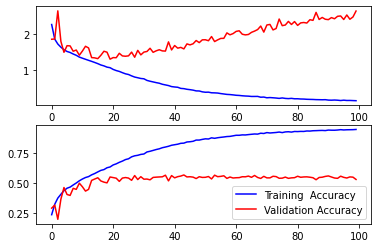

In [102]:
import matplotlib.pyplot as plt
#Plotting the training and validation loss

f,ax=plt.subplots(2,1) #Creates 2 subplots under 1 column

#Assigning the first subplot to graph training loss and validation loss
ax[0].plot(model.history.history['loss'],color='b',label='Training Loss')
ax[0].plot(model.history.history['val_loss'],color='r',label='Validation Loss')

#Plotting the training accuracy and validation accuracy
ax[1].plot(model.history.history['accuracy'],color='b',label='Training  Accuracy')
ax[1].plot(model.history.history['val_accuracy'],color='r',label='Validation Accuracy')

plt.legend()

In [104]:

#Defining function for confusion matrix plot
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

#Print Confusion matrix
    fig, ax = plt.subplots(figsize=(7,7))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")
    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

np.set_printoptions(precision=2)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Confusion matrix, without normalization


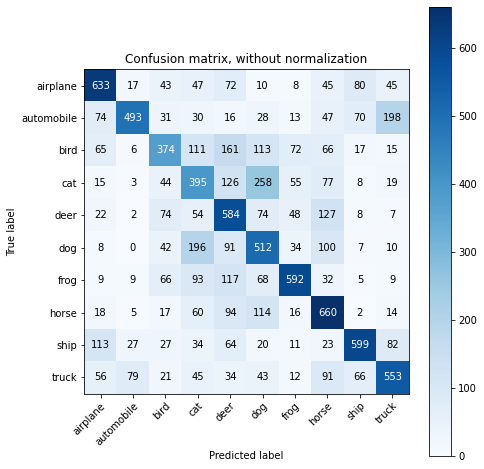

In [106]:
#Making prediction
y_pred=model.predict_classes(x_test)
y_true=np.argmax(y_test,axis=1)

#Plotting the confusion matrix
from sklearn.metrics import confusion_matrix
confusion_mtx=confusion_matrix(y_true,y_pred)

class_names=['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Plotting non-normalized confusion matrix
plot_confusion_matrix(y_true, y_pred, classes = class_names,title = 'Confusion matrix, without normalization')



Normalized confusion matrix


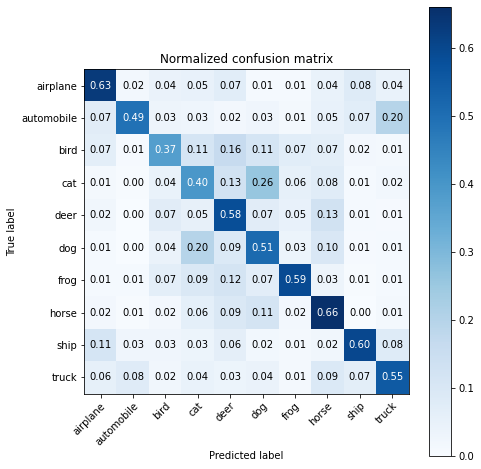

In [107]:
# Plotting normalized confusion matrix
plot_confusion_matrix(y_true, y_pred, classes=class_names, normalize=True, title='Normalized confusion matrix')

In [108]:
#Classification accuracy
from sklearn.metrics import accuracy_score
acc_score = accuracy_score(y_true, y_pred)
print('Accuracy Score = ', acc_score)


Accuracy Score =  0.5395


# **END**